# EDA


## Import Library

In [1]:
import os
import re

import pandas as pd
import numpy as np

from konlpy.tag import Okt, Kkma, Komoran

import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud import WordCloud
%matplotlib inline

## Hyper_parameters

In [2]:
# Colab
# DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/miso'

# Local
DATA_DIR = '/Users/inseoklee/Desktop/miso/data'
SAVE_DIR = '/Users/inseoklee/Desktop/miso/model/CNN_aug'
LOAD_DIR = '/Users/inseoklee/Desktop/miso/model/CNN_aug'

MAX_LEN = 20


## Load Data

In [3]:
df = pd.read_csv(DATA_DIR+ '/end_sentiment.csv')

## Explore

In [4]:
df['label'].unique()

array(['angry', 'sad', 'fear', 'disgusting', 'neutral', 'happy',
       'surprised'], dtype=object)

In [5]:
text = [text for text in df['text'] if type(text) is str]

In [6]:
text

['어, 청소 니가 대신 해 줘!',
 '둘 다 청소 하기 싫어. 귀찮아.',
 '둘 다 하기 싫어서 화내.',
 '그럼 방세는 어떡해.',
 '권태긴줄 알았는데 다른 사람이 생겼나보더라고.',
 '그냥 걷고 있어.',
 '어. 고등학교 동창인데 이렇게 더럽게 쓸줄 몰랐어.',
 '처음 학원에서 만났다가 서로 좋아해서 사귀게 되었지.',
 '내가 애정 표현을 잘 못해서 자주 싸우긴 했어.',
 '오늘 헤어졌어.',
 '룸메이트와 너무 자주 싸우게 돼.',
 '그러고 싶은데 보증금 때문에 그럴 수가 없어.',
 '이 회사가 이번 시즌 마지막 회사였어.',
 '부모님한테 아직 말 안했는데 말하기가 두려워.',
 '아니. 입맛도 없어.',
 '응. 혼 났지.',
 '그럴 시간도 없다.',
 '부모님도 다 슬퍼하셔.',
 '그래, 고마워.',
 '해봤는데, 전화를 안 받네.',
 '맨날 그래 얘는.',
 '어. 크게 다치진 않았는데.',
 '일주일에 다섯번은 먹는다니까?',
 '그저께 아파해서 병원을 갔는데 괜찮아지나 싶더니 결국엔 이렇게 됐네.',
 '다들 마음이 안좋지. 집에 들어가기도 싫네, 나는.',
 '응. 그래봐야지. 해피도 오래 살긴 했어.',
 '그렇지. 뭐 생명까지는 괜찮은데. 우리 마음에 지장이 있네.',
 '지난 번에도 드시고 다친 적 있었거든, 얼굴? 이번에 또 그런 거야.',
 '다들 지쳤어. 나도 지쳤구, 이제.',
 '어제 밤 새서 작성한 기획안 다시 해야되네.',
 '그렇지. 아픈데도 했더니, 참, 근데 맞는 말이라서.',
 '응. 마음 좀 추스려야지. 근데 내가 잘하는게 없는 거 같네.',
 '모르겠어. 좀 최대한 추스려볼게.',
 '노력하면 괜찮아지겠지. 근데 내가 실력이 부족한 건 맞아.',
 '청소 좀 하고 살자.',
 '응. 그 동안 괜찮았는데.',
 '응. 인제 병원에서 퇴원하는 길이야.',
 '이제 두 달 지났어.',
 '어제 지진 있었잖아. 다행히 다치진 않았어.',
 '옆에서 친구가 넘어져서 발목 다쳤어.',
 '아니 룸메

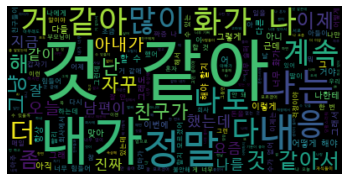

<Figure size 1008x576 with 0 Axes>

In [7]:
wordcloud = WordCloud(font_path=DATA_DIR + '/D2Coding-Ver1.3.2-20180524.ttf').generate(' '.join(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(14, 8))
plt.show()

### 정규표현식

In [8]:
df['text'][0]

'어, 청소 니가 대신 해 줘!'

In [9]:
text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", df['text'][0])
print(text)

어 청소 니가 대신 해 줘


In [15]:
def preprocessing(text, okt, remove_stopwords=False, stop_words=[]):
    # 함수의 인자는 다음과 같다.
    # text: 전처리할 텍스트
    # okt: okt객체를 반복적으로 생성하지 않고 미리 생성한 후 인자로 받는다.
    # remove_stopwords: 불용어를 제거할지 여부 선택. 기본값은 False
    # stop_words: 불용어 사전은 사용자가 직접 입력.

    # 1. 한글 및 공백을 제외한 문자를 모두 제거
    text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", text)

    # 2. okt 객체를 활용하여 형태소 단위로 나눈다
    word_text = okt.morphs(text, stem=True)

    if remove_stopwords:
        word_text = [token for token in word_text if not token in stop_words]

    return word_text

In [16]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한'])
okt = Okt()
clean_train_text = []

for text in df['text']:
    # 비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(text) == str:
        clean_train_text.append(preprocessing(text, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_train_text.append([]) #string이 아니면 비어있는 값 추가

clean_train_text[:4]

[['어', '청소', '니', '대신', '해', '주다'],
 ['둘', '다', '청소', '하다', '싫다', '귀찮다'],
 ['둘', '다', '하다', '싫다', '화내'],
 ['그렇다', '방', '세다', '어떡하다']]